# Is Teaching Worth it?

CSE 184 Final Project

Duncan Bark, Marcus Nikaido, Tanner Faber

# README

In order to run this code, one must have the following items installed and updated.
    - Plotly (for Geoplots and dynamic visualizations)
    - xlrd (for reading in excel files)
    - Pandas (for data wrangling and manipulation)
    - Matplotlib (for static visualizations)
    
One must also have the following files in the local directory. These files are included in the zip file, with the links to whre they were acquired in the summary document.
    - collegepricingCSV.csv
    - rpp2008-2017.xlsx
    - stateCodes.xlsx
    - teacherSal30.xlsx
    - teacherSalary2009.xlsx
    - teacherSalary2011.xlsx
    - teacherSalary2013.xlsx
    - teacherSalary2015.xlsx
    - teacherSalary2017.xlsx

###############################################################################################################################

# Code

Completed by Duncan Bark, Marcus Nikaido, and Tanner Faber.

The following code was created jointly by each team member. Sections of code completed solely by one member is labeled with the member's name. Sections of code completed collaboratively is labeled as such.

In [362]:
# Libaray import cell

import plotly.graph_objects as go
import plotly as plotly
import pandas as pd
import itertools
from matplotlib.pyplot import *

In [433]:
# Primary data wrangling and manipulation cell. Includes work done by each member, along with some collaborative work.

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
stateCodes = states + [''] + [''] + states

#############################################################################################################################

# Tanner's Data Set Work ----------------------------------------------------------------------------------------------------
df_sal = pd.read_excel('teacherSal30.xlsx')
df_sal.insert(1, 'State Code', pd.DataFrame(stateCodes))

df_sal_col = list(df_sal)
df_years = df_sal_col[2:]

# Duncan's Data Set Work ----------------------------------------------------------------------------------------------------
dc = pd.read_csv("collegepricingCSV.csv")[0:106].drop('Unnamed: 19', axis = 1)
dc = dc.drop([39,39])
dc = dc.reset_index(drop=True)
dc.insert(1, 'State Code', pd.DataFrame(stateCodes))

dcCols = list(dc)
dcCols = [x.strip(' ') for x in dcCols]
dc.columns = dcCols

dc19, dcCur = dc[:51].copy(), dc[53:].copy()

for c in dcCols[1:]:
    dc19[c] = dc19[c].str.replace('[,$%]','')
    dcCur[c] = dcCur[c].str.replace('[,$%]','')

#dc19 -- Tuition Fees for labeled year (2 year in-district, 4 year in-state) in 2019 dollars
#dcCur -- Tuition Fees for labeled year (2 year in-district, 4 year in-state) in current year's dollars

dc19ID = dc19.iloc[:, 0:20]
dc19IS = (pd.DataFrame(dc19['States'])).join((pd.DataFrame(dc19['State Code'])).join(dc19.iloc[:, 20:]))

dcCurID = dcCur.iloc[:, 0:20]
dcCurIS = (pd.DataFrame(dcCur['States'])).join((pd.DataFrame(dcCur['State Code'])).join(dcCur.iloc[:, 20:]))

#dc19ID -- Tuition Fees for labeled year for a 2 year in-district school in 2019 dollars
#dc19IS -- Tuition Fees for labeled year for a 4 year in-state school in 2019 dollars
#dcCurID -- Tuition Fees for labeled year for a 2 year in-district school in current year's dollars
#dcCurIS -- Tuition Fees for labeled year for a 4 year in-state school in current year's dollars

years = dcCols[2:18]
yearsIS = dcCols[20:-2]

rankingCols = dcCols[:18] + dcCols[20:-2]
sortedDF = pd.DataFrame(columns = rankingCols)

sortedDF['States'] = dc['States']
sortedDF['State Code'] = dc['State Code']

for c in rankingCols[2:18]:    
    sortedDF[c] = (dc19ID[c].apply(pd.to_numeric, errors='coerce')).rank(method='min')
for c in rankingCols[18:]:
    sortedDF[c] = (dc19IS[c].apply(pd.to_numeric, errors='coerce')).rank(method='min')

# Marcus' Data Set Work -----------------------------------------------------------------------------------------------------
codes = pd.read_csv('stateCodes.csv')
codes = codes.drop(columns='Abbrev')

rpp = pd.read_csv('rpp2008-2017.csv')
rpp = rpp[1:]
rpp = rpp.drop('GeoFips',axis=1)
rpp = rpp.apply(lambda x: (100/x) if x.name in list(rpp.filter(regex='20')) else x)
rpp = rpp.reset_index(drop=True)
rpp = rpp.join(codes)
rpp = rpp.drop(columns='GeoName')

teacherSalary = pd.read_excel('teacherSalary2017.xlsx')
teacherSalary = teacherSalary.dropna()
teacherSalary = teacherSalary[['State','2009-10','2015-16','2016-17']]
teacherSalary['State'] = teacherSalary['State'].map(lambda x: x.lstrip('+-').rstrip('.'))
teacherSalary = teacherSalary.rename(columns={'2009-10':'2010','2015-16':'2016','2016-17':'2017'})

teacherSalary1 = pd.read_excel('teacherSalary2015.xlsx')
teacherSalary1 = teacherSalary1.dropna()
teacherSalary1 = teacherSalary1[['State','2013-14','2014-15']]
teacherSalary1['State'] = teacherSalary1['State'].map(lambda x: x.lstrip('+-').rstrip('.'))
teacherSalary1 = teacherSalary1.rename(columns={'2013-14':'2014','2014-15':'2015'})

teacherSalary2 = pd.read_excel('teacherSalary2013.xlsx')
teacherSalary2 = teacherSalary2[['State','2011-12','2012-13']]
teacherSalary2 = teacherSalary2.dropna()
teacherSalary2['State'] = teacherSalary2['State'].map(lambda x: x.lstrip('+-').rstrip('.'))
teacherSalary2 = teacherSalary2.rename(columns={'2011-12':'2012','2012-13':'2013'})

teacherSalary3 = pd.read_excel('teacherSalary2009.xlsx')
teacherSalary3 = teacherSalary3[['State','2005-06','2007-08','2008-09']]
teacherSalary3 = teacherSalary3.dropna()
teacherSalary3['State'] = teacherSalary3['State'].map(lambda x: x.lstrip('+-').rstrip('.'))
teacherSalary3 = teacherSalary3.rename(columns={'2005-06':'2006','2007-08':'2008','2008-09':'2009'})

teacherSalary4 = pd.read_excel('teacherSalary2011.xlsx')
teacherSalary4 = teacherSalary4[['State','2010-11']]
teacherSalary4 = teacherSalary4.dropna()
teacherSalary4['State'] = teacherSalary4['State'].map(lambda x: x.lstrip('+-').rstrip('.'))
teacherSalary4 = teacherSalary4.rename(columns={'2010-11':'2011'})

teacherSalary= teacherSalary.join(teacherSalary1.set_index('State'),on='State')
teacherSalary= teacherSalary.join(teacherSalary2.set_index('State'),on='State')
teacherSalary= teacherSalary.join(teacherSalary3.set_index('State'),on='State')
teacherSalary= teacherSalary.join(teacherSalary4.set_index('State'),on='State')

teacherSalary = teacherSalary.reindex(sorted(teacherSalary.columns), axis=1)
teacherSalary = teacherSalary.drop(columns=['2006'])
teacherSalary = teacherSalary.reset_index(drop=True)

yearsM = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
df = pd.DataFrame(columns=yearsM)
rppRank = pd.DataFrame(columns=yearsM)
effectiveSalaryRank = pd.DataFrame(columns=yearsM)
for year in yearsM:
    df[year] = teacherSalary[year].multiply(rpp[year],'State')
    rppRank[year] = rpp[year].rank(ascending=False,method='max')
    effectiveSalaryRank[year] = df[year].rank(ascending=False,method='max')
    rppRank[year] = rppRank[year].astype('int32')
    effectiveSalaryRank[year] = effectiveSalaryRank[year].astype('int32')
    
df = df.astype(int)
years1 = list(df)

df = df.join(codes)

# Collaborative Data Work ---------------------------------------------------------------------------------------------------
averageRank = (pd.DataFrame(dc['States'][0:51])).join(pd.DataFrame(dc['State Code'])).join(pd.DataFrame(columns=yearsM))
aRankRank = averageRank.copy()
zippedYears = zip(yearsM, yearsIS[4:-2])

for (m,d) in zippedYears:
    averageRank[m] = effectiveSalaryRank[m]*(3/4) + sortedDF[d]*(1/4)
    
for y in yearsM:
    aRankRank[y] = averageRank[y].rank(method='min')
    
dc19ISCopy = dc19IS.copy()
sortedDFCopy = sortedDF.copy()

sortedDFCopy = sortedDFCopy.rename(columns={'2008-09.1' : yearsM[0], '2009-10.1' : yearsM[1],'2010-11.1' : yearsM[2],'2011-12.1' : yearsM[3],'2012-13.1' : yearsM[4],'2013-14.1' : yearsM[5],'2014-15.1' : yearsM[6],'2015-16.1' : yearsM[7],'2016-17.1' : yearsM[8],'2017-18.1' : yearsM[9]})
dc19ISCopy = dc19ISCopy.rename(columns={'2008-09.1' : yearsM[0], '2009-10.1' : yearsM[1],'2010-11.1' : yearsM[2],'2011-12.1' : yearsM[3],'2012-13.1' : yearsM[4],'2013-14.1' : yearsM[5],'2014-15.1' : yearsM[6],'2015-16.1' : yearsM[7],'2016-17.1' : yearsM[8],'2017-18.1' : yearsM[9]})

for y in yearsM:
    df[y] = df[y].astype({y:str})
    effectiveSalaryRank[y] = effectiveSalaryRank[y].astype({y:str})
    sortedDFCopy[y] = sortedDFCopy[y].astype({y:str})
    dc19ISCopy[y] = dc19ISCopy[y].astype({y:str})
    

usaverage = []
for y in df_years:
    usaverage.append(df_sal[y].mean())

salAvgDF = df_sal.copy()
for i,y in enumerate(df_years):
    salAvgDF[y] = (salAvgDF[y] > usaverage[i]).astype(int)

In [468]:
# Priumary visualization cell. This cell includes the code to create the plotly figures using the data from the previous cell.
# This cell includes work done by each team member, along with some collaborative work.

w = 900
h = 450

# Tanner's Visualization Work -----------------------------------------------------------------------------------------------
salary = []
for year in df_years:
    data = dict(
                type='choropleth',
                locations = df_sal['State Code'],
                z=df_sal[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = df_sal['State'],
                colorbar_title="$USD",
                reversescale = False,
                name=''
            )

    salary.append(data)


stepsSal = []
for i in range(len(salary)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(salary))]},
                        # Set the title for the ith trace
                        {'title.text': 'Teacher Salary: %d' % (i + 1990)}
                        ],
                label = i + 1990
            )
    stepsSal.append(step)

# Build sliders
slidersSalary = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsSal
)]

layoutSalary = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersSalary, width=w, height=h)

salaryfig = go.Figure(data=salary, layout=layoutSalary)
    
# Duncan's Visualization Work -----------------------------------------------------------------------------------------------
#############################################################################################################################
# In-State Plot (2019 Dollars)

ds19IS = []
for year in yearsIS:
    data = dict(
                type='choropleth',
                locations = dc19IS['State Code'],
                z=dc19IS[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = dc19IS['States'],
                colorbar_title="$USD",
                reversescale = True,
                name=''
            )

    ds19IS.append(data)


steps19IS = []
for i in range(len(ds19IS)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(ds19IS))]},
                        # Set the title for the ith trace
                        {'title.text': '4 Year In-State Tuition (2019 Dollars): %d' % (i + 2004)}
                        ],
                label = i + 2004
            )
    steps19IS.append(step)

# Build sliders
sliders19IS = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = steps19IS
)]

layout19IS = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders19IS, width=w, height=h)

fig19IS = go.Figure(data=ds19IS, layout=layout19IS)

##########################################################################################################################
# In-District Plot (2019 Dollars)

ds19ID = []
for year in years:
    data = dict(
                type='choropleth',
                locations = dc19ID['State Code'],
                z=dc19ID[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = dc19ID['States'],
                colorbar_title="$USD",
                reversescale = True,
                name=''
            )

    ds19ID.append(data)


steps19ID = []
for i in range(len(ds19ID)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(ds19ID))]},
                        # Set the title for the ith trace
                        {'title.text': '2 Year In-District Tuition (2019 Dollars): %d' % (i + 2004)}
                        ],
                label = i + 2004
            )
    steps19ID.append(step)

# Build sliders
sliders19ID = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = steps19ID
)]

layout19ID = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders19ID, width=w, height=h)

fig19ID = go.Figure(data=ds19ID, layout=layout19ID)

##########################################################################################################################
# In-State Plot (Current Dollars)

dsCurIS = []
for year in yearsIS:
    data = dict(
                type='choropleth',
                locations = dcCurIS['State Code'],
                z=dcCurIS[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = dcCurIS['States'],
                colorbar_title="$USD",
                reversescale = True,
                name=''
            )

    dsCurIS.append(data)


stepsCurIS = []
for i in range(len(dsCurIS)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(dsCurIS))]},
                        # Set the title for the ith trace
                        {'title.text': '4 Year In-State Tuition (Current Dollars): %d' % (i + 2004)}
                        ],
                label = i + 2004
            )
    stepsCurIS.append(step)

# Build sliders
slidersCurIS = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsCurIS
)]

layoutCurIS = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersCurIS, width=w, height=h)

figCurIS = go.Figure(data=dsCurIS, layout=layoutCurIS)

##########################################################################################################################
# In-District Plot (Current Dollars)

dsCurID = []
for year in years:
    data = dict(
                type='choropleth',
                locations = dcCurID['State Code'],
                z=dcCurID[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = dcCurID['States'],
                colorbar_title="$USD",
                reversescale = True,
                name=''
            )

    dsCurID.append(data)


stepsCurID = []
for i in range(len(dsCurID)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(dsCurID))]},
                        # Set the title for the ith trace
                        {'title.text': '2 Year In-District Tuition (Current Dollars): %d' % (i + 2004)}
                        ],
                label = i + 2004
            )
    stepsCurID.append(step)

# Build sliders
slidersCurID = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsCurID
)]

layoutCurID = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersCurID, width=w, height=h)

figCurID = go.Figure(data=dsCurID, layout=layoutCurID)

##########################################################################################################################
# Sorted (Ranked) In-District Plot (2019 Dollars)

dsSortedID = []
for year in years:
    data = dict(
                type='choropleth',
                locations = sortedDF['State Code'],
                z=sortedDF[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = sortedDF['States'] +'<br>'+ \
                    'Cost: $' + dc19ID[year],
                colorbar_title="Rank",
                reversescale = True,
                name=''
            )

    dsSortedID.append(data)


stepsSortedID = []
for i in range(len(dsSortedID)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(dsSortedID))]},
                        # Set the title for the ith trace
                        {'title.text': '2 Year In-District Tuition Rank: %d' % (i + 2004)}
                        ],
                label = i + 2004
            )
    stepsSortedID.append(step)

# Build sliders
slidersSortedID = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsSortedID
)]

layoutSortedID = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersSortedID, width=w, height=h)

figSortedID = go.Figure(data=dsSortedID, layout=layoutSortedID)

##########################################################################################################################
# Sorted (Ranked) In-State Plot (2019 Dollars)

dsSortedIS = []
for year in yearsIS:
    data = dict(
                type='choropleth',
                locations = sortedDF['State Code'],
                z=sortedDF[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = sortedDF['States'] +'<br>'+ \
                    'Cost: $' + dc19IS[year],
                colorbar_title="Rank",
                reversescale = True,
                name=''
            )

    dsSortedIS.append(data)


stepsSortedIS = []
for i in range(len(dsSortedIS)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(dsSortedIS))]},
                        # Set the title for the ith trace
                        {'title.text': '4 Year In-State Tuition Rank: %d' % (i + 2004)}
                        ],
                label = i + 2004
            )
    stepsSortedIS.append(step)

# Build sliders
slidersSortedIS = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsSortedIS
)]

layoutSortedIS = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersSortedIS, width=w, height=h)

figSortedIS = go.Figure(data=dsSortedIS, layout=layoutSortedIS)

# Marcus' Visualization Work ------------------------------------------------------------------------------------------------
##########################################################################################################################
# Effective Salary Plot

effectiveSalary = []
for year in years1:
    data = dict(
                type='choropleth',
                locations = df['Code'],
                z=df[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = effectiveSalaryRank[year],
                colorbar_title="Effective Salary",
                reversescale = False,
                name=''
            )

    effectiveSalary.append(data)
    
stepsEffectiveSalary = []
for i in range(len(yearsM)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(effectiveSalary))]},
                        # Set the title for the ith trace
                        {'title.text': 'Effective Salary %d' % (i + 2008)}
                        ],
                label = i + 2008
            )
    stepsEffectiveSalary.append(step)

# Build sliders
slidersEffectiveSalary = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsEffectiveSalary
)]

layoutEffectiveSalary = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersEffectiveSalary, width=w, height=h)

figEffectiveSalary = go.Figure(data=effectiveSalary, layout=layoutEffectiveSalary)

##########################################################################################################################
# Teacher Pay Plot

teacherPay = []
for year in years1:
    data = dict(
                type='choropleth',
                locations = df['Code'],
                z=teacherSalary[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = teacherSalary['State'],
                colorbar_title="Teacher Salary",
                reversescale = False,
                name=''
            )

    teacherPay.append(data)
    
stepsTeacherPay = []
for i in range(len(yearsM)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(effectiveSalary))]},
                        # Set the title for the ith trace
                        {'title.text': 'Teacher Salary %d' % (i + 2008)}
                        ],
                label = i + 2008
            )
    stepsTeacherPay.append(step)

# Build sliders
slidersTeacherPay = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsTeacherPay
)]

layoutTeacherPay = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersTeacherPay, width=w, height=h)

figTeacherPay = go.Figure(data=teacherPay, layout=layoutTeacherPay)

##########################################################################################################################
# Regional Price Parity Plot

regionalPrice = []
for year in years1:
    data = dict(
                type='choropleth',
                locations = rpp['Code'],
                z=rpp[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = rppRank[year],
                colorbar_title="Regional Price Parity",
                reversescale = True,
                name=''
            )

    regionalPrice.append(data)
    
stepsRegionalPrice = []
for i in range(len(yearsM)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(regionalPrice))]},
                        # Set the title for the ith trace
                        {'title.text': 'Regional Price Parity %d' % (i + 2008)}
                        ],
                label = i + 2008
            )
    stepsRegionalPrice.append(step)

# Build sliders
slidersRegionalPrice = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsRegionalPrice
)]

layoutRegionalPrice = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersRegionalPrice, width=w, height=h)

figRegionalPrice = go.Figure(data=regionalPrice, layout=layoutRegionalPrice)

##########################################################################################################################
# Regional Price Rank Plot

regionalPriceRank = []
for year in years1:
    data = dict(
                type='choropleth',
                locations = rpp['Code'],
                z=rppRank[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = rpp[year],
                colorbar_title="Regional Price Parity Rank",
                reversescale = True,
                name=''
            )

    regionalPriceRank.append(data)
    
stepsRegionalPriceRank = []
for i in range(len(yearsM)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(regionalPriceRank))]},
                        # Set the title for the ith trace
                        {'title.text': 'Regional Price Parity Rank %d' % (i + 2008)}
                        ],
                label = i + 2008
            )
    stepsRegionalPriceRank.append(step)

# Build sliders
slidersRegionalPriceRank = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsRegionalPriceRank
)]

layoutRegionalPriceRank = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersRegionalPriceRank, width=w, height=h)

figRegionalPriceRank = go.Figure(data=regionalPriceRank, layout=layoutRegionalPriceRank)

##########################################################################################################################
# Effective Salary Rank Plot

effSalaryRank = []
for year in years1:
    data = dict(
                type='choropleth',
                locations = df['Code'],
                z=effectiveSalaryRank[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = df[year],
                colorbar_title="Effective Salary Rank",
                reversescale = True,
                name=''
            )

    effSalaryRank.append(data)
    
stepsEffectiveSalaryRank = []
for i in range(len(yearsM)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(effectiveSalaryRank))]},
                        # Set the title for the ith trace
                        {'title.text': 'Effective Salary Rank %d' % (i + 2008)}
                        ],
                label = i + 2008
            )
    stepsEffectiveSalaryRank.append(step)

# Build sliders
slidersEffectiveSalaryRank = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsEffectiveSalaryRank
)]

layoutEffectiveSalaryRank = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersEffectiveSalaryRank, width=w, height=h)

figEffectiveSalaryRank = go.Figure(data=effSalaryRank, layout=layoutEffectiveSalaryRank)

# Collaborative Visulization Work -------------------------------------------------------------------------------------------
# Master Index Plot

masterRank = []
for year in yearsM:
    data = dict(
                type='choropleth',
                locations = averageRank['State Code'],
                z=aRankRank[year].astype(float),
                locationmode='USA-states',
                colorscale = 'Viridis',
                text = 'Effective Salary: $'+ df[year] +'<br>'+ \
                    'Effective Salary Rank: ' + effectiveSalaryRank[year] +'<br>'+ \
                    '4-Year In-state Tuition Cost: $' + dc19ISCopy[year] + '<br>' + \
                    '4-Year In-state Tuition Rank: ' + sortedDFCopy[year],
                colorbar_title="State Ranking",
                reversescale = True,
                name=''
            )

    masterRank.append(data)
    
stepsMasterRank = []
for i in range(len(yearsM)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(aRankRank))]},
                        # Set the title for the ith trace
                        {'title.text': 'State Rank (Effective Salary Rank*.75 + Tuition Rank*.25) %d' % (i + 2008)}
                        ],
                label = i + 2008
            )
    stepsMasterRank.append(step)

# Build sliders
slidersMasterRank = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsMasterRank
)]

layoutMasterRank = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersMasterRank, width=w, height=h)

figMasterRank = go.Figure(data=masterRank, layout=layoutMasterRank)

#

avgS = []
for i,year in enumerate(df_years):
    data = dict(
                type='choropleth',
                locations = salAvgDF['State Code'],
                z=salAvgDF[year].astype(float),
                locationmode='USA-states',
                colorscale = 'viridis',
                text = "State's Salary: $" + df_sal[year].astype(str) +'<br>'+ \
                        "National Average: $" + str(int(usaverage[i])),
                colorbar_title="Above (1), Below (0)",
                reversescale = False,
                name=''
            )

    avgS.append(data)


stepsavgS = []
for i in range(len(avgS)):
    step = dict(
                method = 'update',  
                args = [
                        # Make the ith trace visible
                        {'visible': [t == i for t in range(len(avgS))]},
                        # Set the title for the ith trace
                        {'title.text': 'Above or Below National Average: %d' % (i + 1990)}
                        ],
                label = i + 1990
            )
    stepsavgS.append(step)

# Build sliders
slidersavgS = [go.layout.Slider(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 1},
    steps = stepsavgS
)]

layoutavgS = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=slidersavgS, width=w, height=h)

avgFigureTF = go.Figure(data=avgS, layout=layoutavgS)

In [464]:
# This cell shows the figures created in the previous cell. Some plots are commented out and not shown as we believe their
# inclusion would take away from the main ideas and confuse the user. The teacher salary, comparison to state average,
# price parity rank, effective salary rank, in-district tuition rank and in-state tuition plots are shown.

# figEffectiveSalary.show()
# figRegionalPrice.show()
# salaryfig.show()
figTeacherPay.show()
avgFigureTF.show()
figRegionalPriceRank.show()
figEffectiveSalaryRank.show()
# fig19ID.show()
# fig19IS.show()
# # figCurID.show()
# # figCurIS.show()
figSortedID.show()
figSortedIS.show()

In [466]:
# This cell downloads all of the figures as HTML files. This was done by Duncan.
# RUNNING THIS CELL OPENS 9 TABS, AND DOWNLOADS 9 HTML FILES

runCell = False

if runCell:
    figs = [salaryfig, avgFigureTF, figEffectiveSalary, figEffectiveSalaryRank, figRegionalPrice, figRegionalPriceRank, figSortedID, figSortedIS, figMasterRank]
    figsNames = ['salaryfig', 'avgFigureTF','figEffectiveSalary', 'figEffectiveSalaryRank', 'figRegionalPrice', 'figRegionalPriceRank', 'figSortedID', 'figSortedIS', 'figMasterRank']

    for i,f in enumerate(figs):
        fn = figsNames[i] + '.html'
        plotly.offline.plot(f, filename=fn)

In [262]:
# This cell shows the master rank plot. This is the state's rank using our weighting system of the effective salary rank and
# tuition rank.

figMasterRank.show()

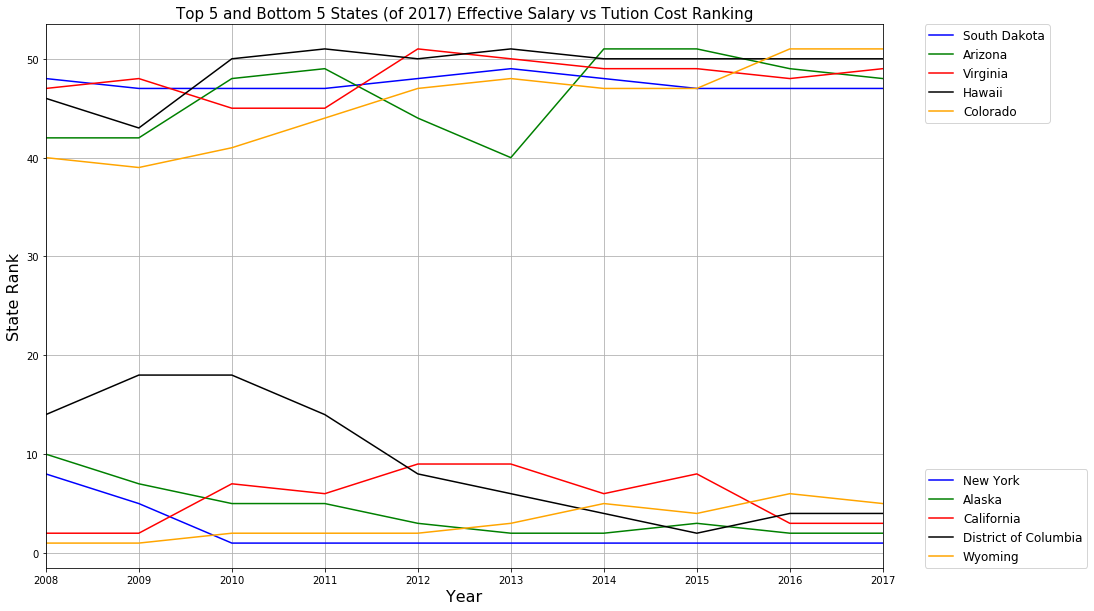

In [382]:
# This cell includes some data wrangling and manipulation and static visualization work. This creates a visualization of
# the top 5 and bottom 5 states master rank from 2008 to 2017. This was completed collaboratively.

arRankSorted = aRankRank.sort_values(by=['2017'])

top5statesDF = arRankSorted[0:5].copy()
top5states = (list(top5statesDF['States']))
bot5statesDF = arRankSorted[-5:].copy()
bot5states = (list(bot5statesDF['States']))

fig = figure(figsize=(15,10))

colors = ['blue', 'g', 'r', 'black', 'orange']
cc = itertools.cycle(colors)

for y in yearsM:
    top5statesDF[y] = top5statesDF[y].astype({y:float})
    bot5statesDF[y] = bot5statesDF[y].astype({y:float})

for i, (name, row) in enumerate(bot5statesDF.iterrows()):
    c = next(cc)
    row[2:].plot(kind='line', color = c)
    
for i, (name, row) in enumerate(top5statesDF.iterrows()):
    c = next(cc)
    row[2:].plot(kind='line', color = c)

title("Top 5 and Bottom 5 States (of 2017) Effective Salary vs Tution Cost Ranking", size=15)
ylabel("State Rank", size=16)
xlabel("Year", size=16)
legend_bot5 = legend(bot5states, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 12})
gca().add_artist(legend_bot5)
legend(top5states, bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0., prop={'size': 12})
grid()
show()